<a href="https://colab.research.google.com/github/zhutian12/Python_Project/blob/master/churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Telecom Churn Analysis


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
#https://drive.google.com/file/d/1WJozKuIy8vQz9YZOgbbXBWegcPcs-KOy/view?usp=sharing
file_id='1WJozKuIy8vQz9YZOgbbXBWegcPcs-KOy'
link='http://drive.google.com/uc?export=download&id={FILE_ID}'
csv_url = link.format(FILE_ID = file_id)
churn_df = pd.read_csv(csv_url)



In [8]:
print(churn_df)

     State  Account length  ...  Customer service calls  Churn
0       KS             128  ...                       1  False
1       OH             107  ...                       1  False
2       NJ             137  ...                       0  False
3       OH              84  ...                       2  False
4       OK              75  ...                       3  False
...    ...             ...  ...                     ...    ...
2661    SC              79  ...                       2  False
2662    AZ             192  ...                       2  False
2663    WV              68  ...                       3  False
2664    RI              28  ...                       2  False
2665    TN              74  ...                       0  False

[2666 rows x 20 columns]


In [9]:
#get target variable
y = churn_df['Churn']

In [10]:
churn_df.describe
churn_df.dtypes
#check the proportion that Churn equal to True
print(y.sum()/y.shape[0]*100)
print(y.sum())
churn_df[churn_df.Churn == True].groupby('State').count()['Churn']

14.553638409602401
388


State
AK     3
AL     7
AR    11
AZ     3
CA     5
CO     7
CT    11
DC     5
DE     8
FL     7
GA     8
HI     2
IA     3
ID     5
IL     4
IN     6
KS    10
KY     6
LA     3
MA     8
MD    14
ME    11
MI    13
MN    13
MO     5
MS    11
MT    10
NC     9
ND     4
NE     4
NH     9
NJ    14
NM     4
NV    13
NY    12
OH    10
OK     7
OR     7
PA     8
RI     3
SC    11
SD     6
TN     5
TX    16
UT     8
VA     4
VT     6
WA    10
WI     4
WV     7
WY     8
Name: Churn, dtype: int64

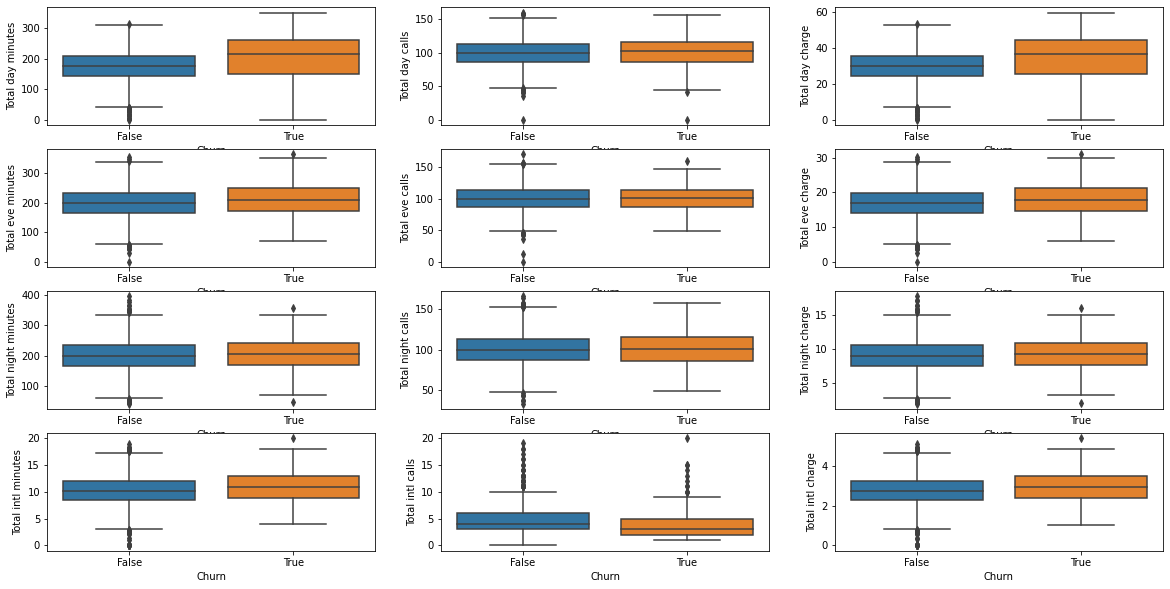

In [11]:
_,axss = plt.subplots(4,3, figsize=[20,10])#People who answer True have higher "Total day/eve/night/intl mins" and "Total day/eve/night/intl charges"
sns.boxplot(x = 'Churn',y='Total day minutes',data = churn_df,ax=axss[0][0])
sns.boxplot(x = 'Churn',y='Total day calls',data = churn_df,ax=axss[0][1])
sns.boxplot(x = 'Churn',y='Total day charge',data = churn_df,ax=axss[0][2])
sns.boxplot(x = 'Churn',y='Total eve minutes',data = churn_df,ax=axss[1][0])
sns.boxplot(x = 'Churn',y='Total eve calls',data = churn_df,ax=axss[1][1])
sns.boxplot(x = 'Churn',y='Total eve charge',data = churn_df,ax=axss[1][2])
sns.boxplot(x = 'Churn',y='Total night minutes',data = churn_df,ax=axss[2][0])
sns.boxplot(x = 'Churn',y='Total night calls',data = churn_df,ax=axss[2][1])
sns.boxplot(x = 'Churn',y='Total night charge',data = churn_df,ax=axss[2][2])
sns.boxplot(x = 'Churn',y='Total intl minutes',data = churn_df,ax=axss[3][0])
sns.boxplot(x = 'Churn',y='Total intl calls',data = churn_df,ax=axss[3][1])
sns.boxplot(x = 'Churn',y='Total intl charge',data = churn_df,ax=axss[3][2])

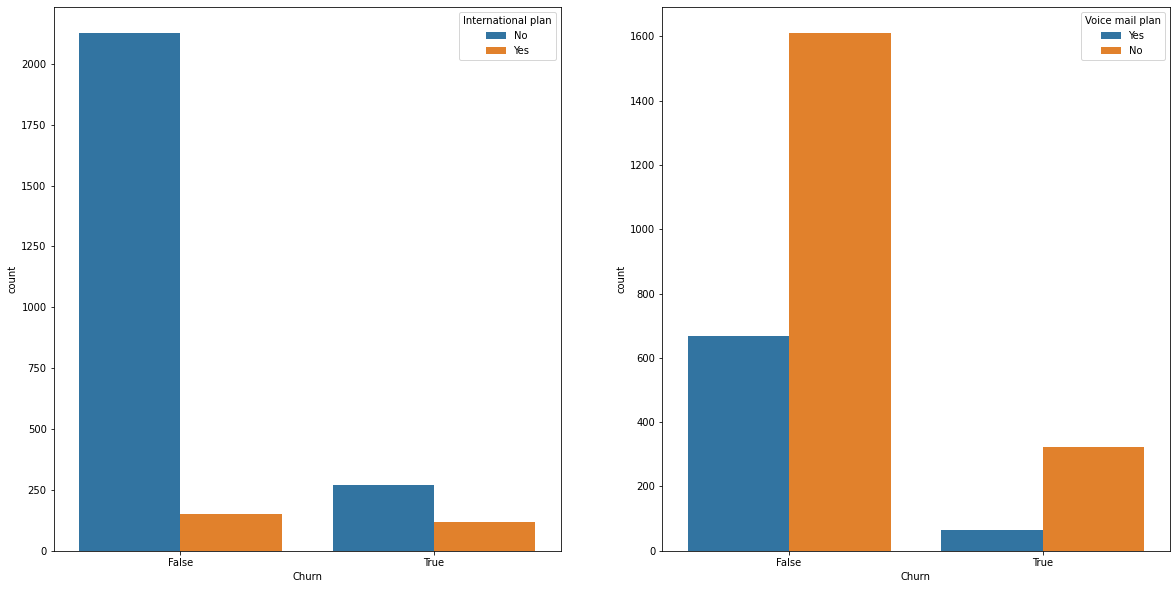

In [12]:
#understand categorical graph: State, International plan, Voice mail plan
_,axss = plt.subplots(1,2,figsize = [20,10])
#sns.countplot(x = 'Churn',hue='State',data = churn_df,ax=axss[0][0])
sns.countplot(x='Churn',hue='International plan',data = churn_df,ax=axss[0])
sns.countplot(x = 'Churn',hue='Voice mail plan',data = churn_df, ax=axss[1])

,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge
Total day minutes,1.000000,0.016780,1.000000,0.003999,0.009059,0.003992,0.013491,0.015054,0.013464,-0.011042,0.005687,-0.010934
Total day calls,0.016780,1.000000,0.016787,-0.026003,0.006473,-0.026006,0.008986,-0.016776,0.008972,0.031036,0.006928,0.031133
Total day charge,1.000000,0.016787,1.000000,0.004008,0.009056,0.004002,0.013495,0.015057,0.013468,-0.011046,0.005688,-0.010938
Total eve minutes,0.003999,-0.026003,0.004008,1.000000,-0.007654,1.000000,-0.013414,0.009017,-0.013450,-0.006915,0.002160,-0.006947
Total eve calls,0.009059,0.006473,0.009056,-0.007654,1.000000,-0.007642,-0.000175,0.000797,-0.000135,0.011012,0.003710,0.011000
Total eve charge,0.003992,-0.026006,0.004002,1.000000,-0.007642,1.000000,-0.013428,0.009030,-0.013464,-0.006923,0.002169,-0.006955
Total night minutes,0.013491,0.008986,0.013495,-0.013414,-0.000175,-0.013428,1.000000,0.012736,0.999999,-0.008607,-0.001110,-0.008510
Total night calls,0.015054,-0.016776,0.015057,0.009017,0.000797,0.009030,0.012736,1.000000,0.012720,-0.023447,0.019367,-0.023434
Total night charge,0.013464,0.008972,0.013468,-0.013450,-0.000135,-0.013464,0.999999,0.012720,1.000000,-0.008615,-0.001099,-0.008517
Total intl minutes,-0.011042,0.031036,-0.011046,-0.006915,0.011012,-0.006923,-0.008607,-0.023447,-0.008615,1.000000,0.037315,0.999993


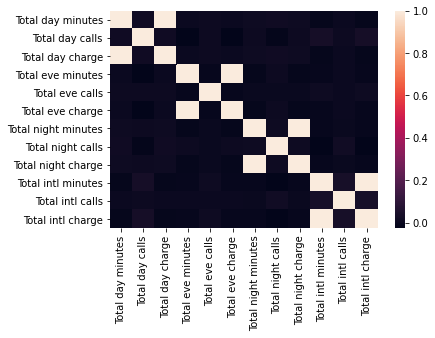

In [13]:
#Correlation between each variable
corr_score=churn_df.loc[:,'Total day minutes':'Total intl charge'].corr()
sns.heatmap(corr_score)
corr_score#we find minutes variable has a perfect positive correlation with charges variable


#Feature reprocess



In [14]:
churn_df['International plan'] = churn_df['International plan'] == "Yes"
churn_df['Voice mail plan'] = churn_df['Voice mail plan'] == "Yes"

In [15]:
to_drop = ['Total day minutes','Total eve minutes','Total night minutes','Total intl minutes','State','Account length','Area code','Churn']
x = churn_df.drop(to_drop,axis=1)

In [16]:
x.head()

,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls
0,False,True,25,110,45.07,99,16.78,91,11.01,3,2.70,1
1,False,True,26,123,27.47,103,16.62,103,11.45,3,3.70,1
2,False,False,0,114,41.38,110,10.30,104,7.32,5,3.29,0
3,True,False,0,71,50.90,88,5.26,89,8.86,7,1.78,2
4,True,False,0,113,28.34,122,12.61,121,8.41,3,2.73,3


In [17]:
y.head()

0    False
1    False
2    False
3    False
4    False
Name: Churn, dtype: bool

#Model training and evaluation


In [30]:
from sklearn import model_selection
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size = 0.25,random_state = 1,stratify = y)#stratify:保证training data和testing data里y的label和整体的y label保持一致。避免y unbalance的情况
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1999, 12)
(667, 12)
(1999,)
(667,)


In [36]:
#standardization
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(x_train)
x_train = scalar.transform(x_train)
x_test = scalar.transform(x_test)

In [20]:
x_test.shape

(667, 12)

In [37]:
#model construction
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#logistic regression
model_logistic = LogisticRegression()
#Random forest
model_rf = RandomForestClassifier()
#KNN
model_knn = KNeighborsClassifier()

In [41]:
#Train the logistic regression model
model_logistic.fit(x_train,y_train)
model_rf.fit(x_train,y_train)
model_knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [45]:
#predict
model_logistic.predict(x_test)


<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

In [43]:
#Accuracy
model_logistic.score(x_test,y_test)

0.863568215892054

In [44]:
#Use 5-fold cross validation to get the accuracy of different models
model_name = ["logistic regression","KNN","Random Forest"]
model_list = [model_logistic,model_knn,model_rf]#no need to add quotes here
n=0
for model in model_list:
  cv_score = model_selection.cross_val_score(model,x_train,y_train,cv = 5)
  print(cv_score)
  print(model_name[n] + " " + "Average CV Score:" + str(cv_score.mean()))
  n += 1

[0.8675     0.855      0.87       0.855      0.85964912]
logistic regression Average CV Score:0.8614298245614036
[0.9025     0.875      0.8875     0.8925     0.88220551]
KNN Average CV Score:0.8879411027568922
[0.965      0.925      0.9375     0.935      0.94736842]
Random Forest Average CV Score:0.9419736842105264


#Use Grid Search to find optimal hyperparameter


In [58]:
#Training Hyperparameter
from sklearn.model_selection import GridSearchCV
def best_hyperparameter(model):
  print("Best Score:" + str(model.best_score_))
  print("Best Hyperparameter:")
  for i in model.best_params_.keys():
    print(i+":"+str(model.best_params_[i]))


In [64]:
parameter = {"penalty":('l1','l2'),
             "C":(1,0.5,0.25)}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameter,cv=5)
Grid_LR.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': (1, 0.5, 0.25), 'penalty': ('l1', 'l2')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [65]:
#print out the best parameter
best_hyperparameter(Grid_LR)

Best Score:0.8624298245614035
Best Hyperparameter:
C:1
penalty:l1


In [67]:
#give the best logistic regression model
best_LR_model = Grid_LR.best_estimator_

In [73]:
#for KNN
parameter = {"n_neighbors":(1,3,5,7,9),
             "algorithm":('auto','ball_tree', 'kd_tree', 'brute')}
Grid_knn = GridSearchCV(KNeighborsClassifier(),parameter,cv=5)
Grid_knn.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': (1, 3, 5, 7, 9)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [77]:
#find the best parameters
best_hyperparameter(Grid_knn)

Best Score:0.8914473684210525
Best Hyperparameter:
algorithm:auto
n_neighbors:3


In [79]:
#best knn model
Best_Grid_knn = Grid_knn.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [82]:
#for random forest
parameter = {"n_estimators":(200,300,400),
             "criterion":("gini","entropy")}
Grid_rf = GridSearchCV(RandomForestClassifier(),parameter,cv=5)
Grid_rf.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [83]:
#find best hyperparameters
best_hyperparameter(Grid_rf)

Best Score:0.9449736842105263
Best Hyperparameter:
criterion:entropy
n_estimators:200


In [88]:
#give best random forest model
best_rf = Grid_rf.best_estimator_
best_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#Model Evaulation 

In [102]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
#define function
def cal_metrics(model,cm):
  TN = cm[0][0]
  FP = cm[0][1]
  FN = cm[1][0]
  TP = cm[1][1]
  Accuracy = (TN+TP)/(TN+FN+TP+FP+0.0)
  Precision = TP/(TP+FP)
  Recall = TP/(TP+FN)
  print(model)
  print("Accuracy:",Accuracy)
  print("Precision:",Precision)
  print("Recall",Recall)
  print(" ")

def model_list(model):
  for cm in model:
    model_name,cm = cm[0],cm[1]
    cal_metrics(model_name,cm)

model_info = [("Logistic regression",confusion_matrix(y_test,best_LR_model.predict(x_test))),
               ("KNN",confusion_matrix(y_test,Best_Grid_knn.predict(x_test))),
              ("Random Forest",confusion_matrix(y_test,best_rf.predict(x_test)))]
model_list(model_info)


Logistic regression
Accuracy: 0.863568215892054
Precision: 0.5882352941176471
Recall 0.20618556701030927
 
KNN
Accuracy: 0.896551724137931
Precision: 0.78
Recall 0.4020618556701031
 
Random Forest
Accuracy: 0.9460269865067467
Precision: 0.9295774647887324
Recall 0.6804123711340206
 


ROC of random forest

In [123]:
from sklearn.metrics import roc_curve
from sklearn import metrics
y_rf = best_rf.predict_proba(x_test)[:,1]
fpr_rf,tpr_rf,threshold=roc_curve(y_test,y_rf)

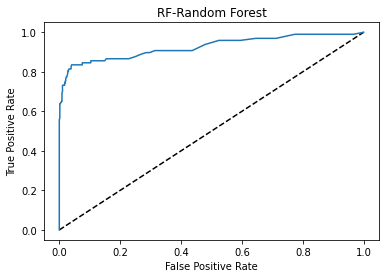

In [109]:
#draw plot
plt.figure(1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_rf,tpr_rf,label = 'rf')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('RF-Random Forest')
plt.show()

In [110]:
#calculate AUC
metrics.auc(fpr_rf,tpr_rf)

0.9253933803581118

ROC of Logistic Regression

In [124]:
y_lf = best_LR_model.predict_proba(x_test)[:,1]
fpr_lr,tpr_lr,_ = roc_curve(y_test,y_lf)


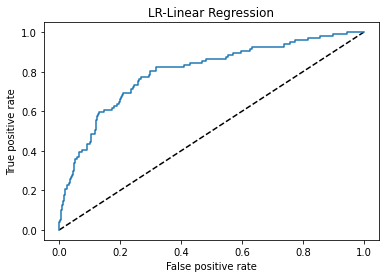

In [125]:
#draw plot
plt.figure(2)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr_lr,tpr_lr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("LR-Linear Regression")
plt.show()

In [126]:
#AUC 
metrics.auc(fpr_lr,tpr_lr)

0.7986977753662508